In [1]:
import pandas as pd
import numpy as np

In [41]:
df = pd.read_csv("Appropriateness.csv")

In [45]:
df_high_conf = df[(df['inappropriate']==0)|(df['inappropriate']==1)]

In [42]:
df.columns

Index(['text', 'inappropriate', 'offline_crime', 'online_crime', 'drugs',
       'gambling', 'pornography', 'prostitution', 'slavery', 'suicide',
       'terrorism', 'weapons', 'body_shaming', 'health_shaming', 'politics',
       'racism', 'religion', 'sexual_minorities', 'sexism', 'social_injustice',
       'human_labeled', 'toxic_auto'],
      dtype='object')

In [43]:
topics = set(df.columns) - set(['text', 'inappropriate', 'human_labeled', 'toxic_auto'])

In [44]:
len(topics)

18

In [6]:
def round_up(val):
    if float(val) > 0.5:
        return 1
    return 0

In [7]:
def get_topic_count(dataframe):
    df_count = pd.DataFrame()
    for c in topics:
        df_count[c] = dataframe[c].apply(round_up)
    df_count['inappropriate'] = dataframe['inappropriate']
    
    counts = []
    app_percentage = []
    names = []
    for col in topics:
        cnt = sum(df_count[col])
        app_samples = len(df_count[(df_count[col]==1)&(df_count['inappropriate']>= 0.5)])
        inapp_samples = len(df_count[(df_count[col]==1)&(df_count['inappropriate']< 0.5)])
        current_app_percentage = round(app_samples/(app_samples+inapp_samples), 2)
        
        counts.append(cnt)
        app_percentage.append(current_app_percentage)
        names.append(col)
         
    df_count_fin = pd.DataFrame({'topic':names, 'count':counts, 'percentage':app_percentage})
    df_count_fin_sorted = df_count_fin.sort_values('topic', ascending = False)
    df_count_fin_sorted.reset_index(drop=True,inplace = True)

    return df_count_fin_sorted

In [8]:
df_counted = get_topic_count(df)

In [46]:
df_counted_high_conf = get_topic_count(df_high_conf)

In [60]:
df_counted_high_conf.head(100)

,topic,count,percentage
0,weapons,4327,0.29
1,terrorism,3394,0.61
2,suicide,3330,0.50
3,social_injustice,5599,0.24
4,slavery,3793,0.35
5,sexual_minorities,3985,0.45
6,sexism,4883,0.25
7,religion,4478,0.36
8,racism,4173,0.50
9,prostitution,4924,0.24


In [9]:
df_counted.head(100)

,topic,count,percentage
0,weapons,7951,0.30
1,terrorism,7301,0.53
2,suicide,6425,0.45
3,social_injustice,7494,0.28
4,slavery,6700,0.38
5,sexual_minorities,7994,0.43
6,sexism,8137,0.29
7,religion,8142,0.38
8,racism,6816,0.48
9,prostitution,8249,0.28


# Stacked bar samples

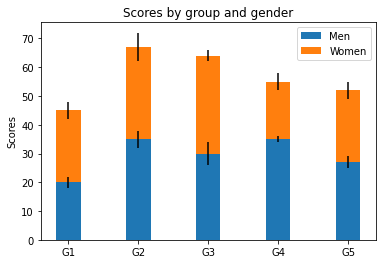

In [10]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html
    
import matplotlib.pyplot as plt


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

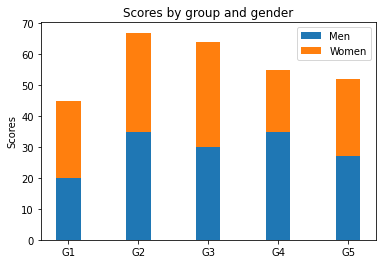

In [11]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, label='Men')
ax.bar(labels, women_means, width, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

In [12]:
import re
re.sub("_", " ", "sdad_dfds")

'sdad dfds'

# ALL SAMPLES COUNT`

In [13]:
topics_labels = df_counted.topic.tolist()
topics_labels = [re.sub("_", " ", el) for el in topics_labels]

In [14]:
c = df_counted['count'].tolist()
p = df_counted['percentage'].tolist()
p_inv = [1-el for el in p]

In [15]:
cv = np.array(c)
pv = np.array(p)
pv_inv = np.array(p_inv)

In [16]:
cv

array([7951, 7301, 6425, 7494, 6700, 7994, 8137, 8142, 6816, 8249, 7889,
       7105, 8174, 8003, 7945, 8096, 7835, 8103])

In [17]:
inappropriate_count = cv * pv

In [18]:
appropriate_count = cv * pv_inv

In [19]:
inappropriate_count

array([2385.3 , 3869.53, 2891.25, 2098.32, 2546.  , 3437.42, 2359.73,
       3093.96, 3271.68, 2309.72, 4102.28, 2699.9 , 2860.9 , 2961.11,
       1032.85, 1619.2 , 3604.1 , 1701.63])

In [20]:
appropriate_count

array([5565.7 , 3431.47, 3533.75, 5395.68, 4154.  , 4556.58, 5777.27,
       5048.04, 3544.32, 5939.28, 3786.72, 4405.1 , 5313.1 , 5041.89,
       6912.15, 6476.8 , 4230.9 , 6401.37])

In [21]:
inappropriate_count = [int(el) for el in inappropriate_count]
appropriate_count = [int(el) for el in appropriate_count]

In [22]:
inappropriate_count

[2385,
 3869,
 2891,
 2098,
 2546,
 3437,
 2359,
 3093,
 3271,
 2309,
 4102,
 2699,
 2860,
 2961,
 1032,
 1619,
 3604,
 1701]

# HIGH CONF

In [49]:
topics_labels_high_conf = df_counted_high_conf.topic.tolist()
topics_labels_high_conf = [re.sub("_", " ", el) for el in topics_labels_high_conf]

In [50]:
c_HC = df_counted_high_conf['count'].tolist()
p_HC = df_counted_high_conf['percentage'].tolist()
p_inv_HC = [1-el for el in p_HC]

In [53]:
c_HC = np.array(c_HC)
p_HC = np.array(p_HC)
p_inv_HC = np.array(p_inv_HC)

In [52]:
c_HC

array([4327, 3394, 3330, 5599, 3793, 3985, 4883, 4478, 4173, 4924, 4934,
       4837, 4238, 4893, 6581, 5278, 5197, 5621])

In [54]:
p_HC

array([0.29, 0.61, 0.5 , 0.24, 0.35, 0.45, 0.25, 0.36, 0.5 , 0.24, 0.54,
       0.35, 0.33, 0.34, 0.1 , 0.13, 0.47, 0.17])

In [55]:
p_inv_HC

array([0.71, 0.39, 0.5 , 0.76, 0.65, 0.55, 0.75, 0.64, 0.5 , 0.76, 0.46,
       0.65, 0.67, 0.66, 0.9 , 0.87, 0.53, 0.83])

In [56]:
inappropriate_count_HC = c_HC * pv
appropriate_count_HC = c_HC * p_inv_HC

In [57]:
inappropriate_count_HC = [int(el) for el in inappropriate_count_HC]
appropriate_count_HC = [int(el) for el in appropriate_count_HC]

In [58]:
inappropriate_count_HC

[1298,
 1798,
 1498,
 1567,
 1441,
 1713,
 1416,
 1701,
 2003,
 1378,
 2565,
 1838,
 1483,
 1810,
 855,
 1055,
 2390,
 1180]

In [59]:
appropriate_count_HC

[3072,
 1323,
 1665,
 4255,
 2465,
 2191,
 3662,
 2865,
 2086,
 3742,
 2269,
 3144,
 2839,
 3229,
 5922,
 4591,
 2754,
 4665]

# DRAW

In [23]:
topic_width = 0.35

In [24]:
from matplotlib.pyplot import figure

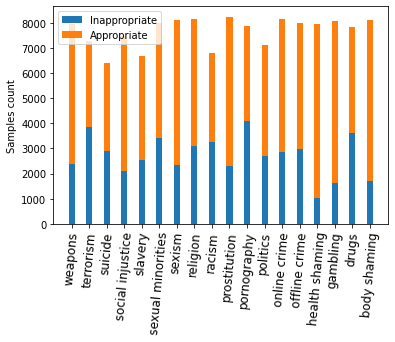

In [26]:
# plt.figure(figsize=(16,14))

fig, ax = plt.subplots()

ax.bar(topics_labels, inappropriate_count, topic_width, label='Inappropriate')
ax.bar(topics_labels, appropriate_count, topic_width, bottom=inappropriate_count,
       label='Appropriate')


plt.xticks(rotation = 85, fontsize=12)
ax.set_ylabel('Samples count')
# ax.set_title('Scores by group and gender')
ax.legend(loc='best')

# 

plt.show()
# plt.savefig("binary_counts.pdf",format='pdf', bbox_inches='tight')

## Multiple bars

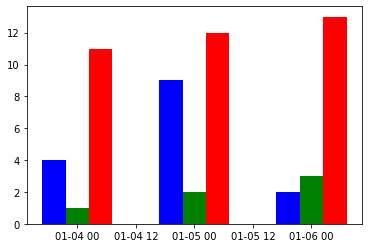

In [27]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime

x = [
    datetime.datetime(2011, 1, 4, 0, 0),
    datetime.datetime(2011, 1, 5, 0, 0),
    datetime.datetime(2011, 1, 6, 0, 0)
]
x = date2num(x)

y = [4, 9, 2]
z = [1, 2, 3]
k = [11, 12, 13]

ax = plt.subplot(111)
ax.bar(x-0.2, y, width=0.2, color='b', align='center')
ax.bar(x, z, width=0.2, color='g', align='center')
ax.bar(x+0.2, k, width=0.2, color='r', align='center')
ax.xaxis_date()

plt.show()

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

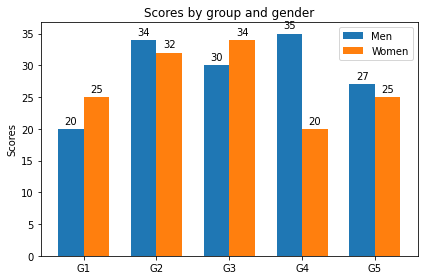

In [29]:



labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


## Get data

In [30]:
df_multi = pd.read_csv("C:/Users/N.Babakov/python_notebooks/toloka/statistics/sensitive/Journal article check - Sheet7.csv")

In [31]:
df_multi.head()

,Sensitive topic,ST v2
0,body shaming,"1,203"
1,drugs,"3,852"
2,gambling,"2,062"
3,health shaming,"1,731"
4,offline crime,"1,835"


In [32]:
# df_multi = df_multi.sort_values('Sensitive topic', ascending = False)

In [33]:
list_topics = df_counted.topic.tolist() 

In [34]:
list_topics = [re.sub("_", " ", el) for el in list_topics]

In [35]:
list_topics == df_multi['Sensitive topic'].tolist()

False

In [36]:
df_multi.head()

,Sensitive topic,ST v2
0,body shaming,"1,203"
1,drugs,"3,852"
2,gambling,"2,062"
3,health shaming,"1,731"
4,offline crime,"1,835"


In [37]:
multi_dataset_count = df_multi['ST v2'].tolist()

In [38]:
topics_labels

['weapons',
 'terrorism',
 'suicide',
 'social injustice',
 'slavery',
 'sexual minorities',
 'sexism',
 'religion',
 'racism',
 'prostitution',
 'pornography',
 'politics',
 'online crime',
 'offline crime',
 'health shaming',
 'gambling',
 'drugs',
 'body shaming']

In [39]:
multi_dataset_count = [re.sub(',','',el) for el in multi_dataset_count]
multi_dataset_count = [int(el) for el in multi_dataset_count]

multi_dataset_count

[1203,
 3852,
 2062,
 1731,
 1835,
 1033,
 2155,
 2002,
 1291,
 1572,
 4072,
 1592,
 1967,
 1054,
 1875,
 1407,
 1303,
 2222]

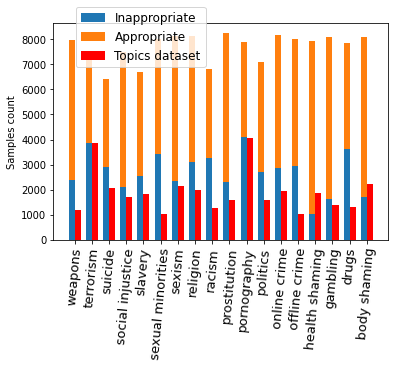

In [40]:
# plt.figure(figsize=(16,14))

fig, ax = plt.subplots()

x_topics = np.arange(len(topics_labels))

# rects1 = ax.bar(x - width/2, men_means, width, label='Men')
# rects2 = ax.bar(x + width/2, women_means, width, label='Women')

rects1 = ax.bar(x_topics - topic_width/2, inappropriate_count, topic_width, label='Inappropriate')
rects2 = ax.bar(x_topics - topic_width/2, appropriate_count, topic_width, bottom=inappropriate_count,
       label='Appropriate')

rects2 = ax.bar(x_topics + topic_width/2, multi_dataset_count, topic_width, color='r', label = 'Topics dataset')

ax.set_xticks(x_topics)
ax.set_xticklabels(topics_labels)

plt.xticks(rotation = 85, fontsize=13)
ax.set_ylabel('Samples count')
# ax.set_title('Scores by group and gender')
# ax.legend(loc='best')

ax.legend(bbox_to_anchor=(0.05, 1.1), loc='upper left',fontsize=12)

# 

plt.show()
# plt.savefig("counts.pdf",format='pdf', bbox_inches='tight')

In [80]:
x_topics

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

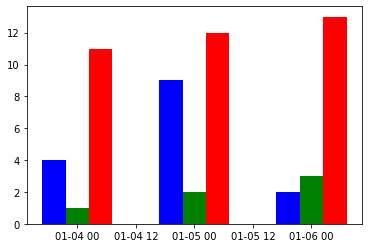

In [81]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime

x = [
    datetime.datetime(2011, 1, 4, 0, 0),
    datetime.datetime(2011, 1, 5, 0, 0),
    datetime.datetime(2011, 1, 6, 0, 0)
]
x = date2num(x)

y = [4, 9, 2]
z = [1, 2, 3]
k = [11, 12, 13]

ax = plt.subplot(111)
ax.bar(x-0.2, y, width=0.2, color='b', align='center')
ax.bar(x, z, width=0.2, color='g', align='center')
ax.bar(x+0.2, k, width=0.2, color='r', align='center')
ax.xaxis_date()

plt.show()

In [101]:
x_topics = np.arange(len(topics_labels))
x_topics = [el+ 0.2 for el in x_topics]
x_topics = np.array(x_topics)
x_topics

array([ 0.2,  1.2,  2.2,  3.2,  4.2,  5.2,  6.2,  7.2,  8.2,  9.2, 10.2,
       11.2, 12.2, 13.2, 14.2, 15.2, 16.2, 17.2])

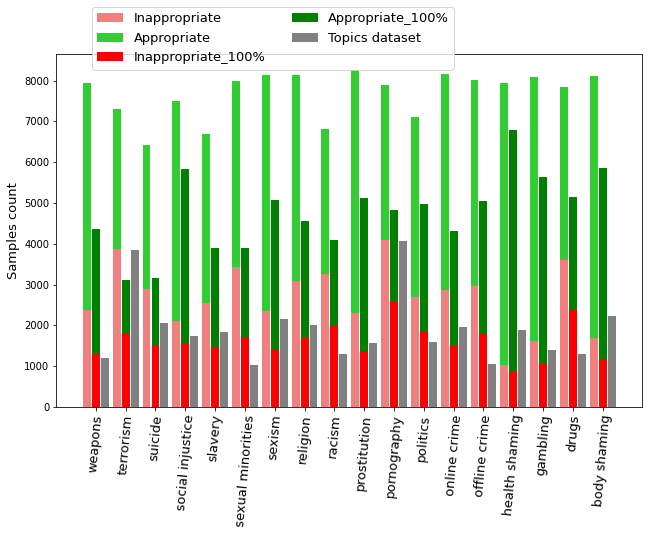

In [128]:
# plt.figure(figsize=(16,14))
topic_width_MANY_DIM = 0.265

fig, ax = plt.subplots()

x_topics = np.arange(len(topics_labels))
x_topics = [el + 3.5 for el in x_topics]
x_topics = np.array(x_topics)


ax.bar(x_topics - 0.3, inappropriate_count, topic_width_MANY_DIM, label='Inappropriate', color='lightcoral')
ax.bar(x_topics - 0.3, appropriate_count, topic_width_MANY_DIM, bottom=inappropriate_count,color='limegreen', label='Appropriate')

ax.bar(x_topics, inappropriate_count_HC, topic_width_MANY_DIM, label='Inappropriate_100%',color = 'red')
ax.bar(x_topics, appropriate_count_HC, topic_width_MANY_DIM, bottom=inappropriate_count_HC,color = 'green',
       label='Appropriate_100%')

ax.bar(x_topics + 0.3, multi_dataset_count, topic_width_MANY_DIM, color='gray', label = 'Topics dataset')

# ax.set_xticks(x_topics)
# ax.set_xticklabels(topics_labels)
plt.xticks(x_topics, topics_labels)

plt.xticks(rotation = 85, fontsize=13)
ax.set_ylabel('Samples count', fontsize=13)
# ax.set_title('Scores by group and gender')
# ax.legend(loc='best')

ax.legend(bbox_to_anchor=(0.05, 1.15), loc='upper left',fontsize=13, ncol = 2)

# 
fig.set_size_inches(10.5, 6.5)

# plt.show()
plt.savefig("al_datasets_counts.pdf",format='pdf', bbox_inches='tight')